<a href="https://colab.research.google.com/github/atulkhapake/DECISION-TREE-CLASSIFICATION/blob/main/car_fare_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing required libraries
import os #getting access to input files
import pandas as pd # Importing pandas for performing EDA
import numpy as np  # Importing numpy for Linear Algebric operations
import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns # Importing for Data Visualization
from collections import Counter 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression #ML algorithm
from sklearn.model_selection import train_test_split #splitting dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV    

%matplotlib inline

In [232]:
#Loading the data:
train  = pd.read_excel("train.xlsx",na_values={"pickup_datetime":"43"})
test   = pd.read_excel("test.xlsx")

In [233]:
train.head() #checking first five rows of the training dataset

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [234]:
test.head() #checking first five rows of the test dataset


,Unnamed: 0,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,NaN,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,NaN,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,NaN,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,NaN,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,NaN,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [235]:
print("shape of training data is: ",train.shape) #checking the number of rows and columns in training data
print("shape of test data is: ",test.shape) #checking the number of rows and columns in test data

shape of training data is:  (14152, 7)
shape of test data is:  (6152, 7)


In [236]:
train.dtypes #checking the data-types in training dataset


fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [237]:
test.dtypes #checking the data-types in test dataset


Unnamed: 0           float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [238]:
train.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,14128.000000,14152.000000,14152.000000,14152.000000,14152.000000,14098.000000
mean,15.502882,-72.435936,39.899511,-72.430254,39.874750,2.755541
std,458.696460,10.682919,6.999119,10.696529,6.305812,64.840390
min,-430.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992152,40.734682,-73.991181,40.734711,1.000000
50%,8.500000,-73.981695,40.752643,-73.980089,40.753724,1.000000
75%,12.500000,-73.966759,40.767410,-73.963454,40.768188,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [239]:
test.describe()


,Unnamed: 0,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,0.0,6152.000000,6152.000000,6152.000000,6152.000000,6152.0
mean,NaN,-73.975055,40.751258,-73.974211,40.751487,1.0
std,NaN,0.040445,0.031834,0.036238,0.033633,0.0
min,NaN,-74.252193,40.573143,-74.263242,40.568973,1.0
25%,NaN,-73.992309,40.736337,-73.991266,40.735181,1.0
50%,NaN,-73.982142,40.753575,-73.979885,40.753927,1.0
75%,NaN,-73.967697,40.767371,-73.964094,40.768753,1.0
max,NaN,-73.137393,41.366138,-73.137393,41.366138,1.0


Data cleaning and Missing value analysis

In [240]:

#Convert fare_amount from object to numeric
train["fare_amount"] = pd.to_numeric(train["fare_amount"],errors = "coerce")  #Using errors=’coerce’. It will replace all non-numeric values with NaN.

In [241]:
train.dtypes


fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [242]:
test.dtypes

Unnamed: 0           float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [243]:
train.shape


(14152, 7)

In [244]:
train.dropna(subset= ["pickup_datetime"])   #dropping NA values in datetime column


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
...,...,...,...,...,...,...,...
14147,16.6,2009-02-07 21:53:40 UTC,-73.978608,40.762113,-73.978307,40.762792,1.0
14148,9.0,2014-12-28 15:57:00 UTC,-73.989560,40.743390,-73.962170,40.756490,1.0
14149,8.5,2015-06-02 18:38:41 UTC,-73.958672,40.764427,-73.975357,40.752201,1.0
14150,8.1,2009-01-20 15:15:00 UTC,-73.953725,40.766800,-73.979067,40.766660,1.0


In [245]:
# Here pickup_datetime variable is in object so we need to change its data type to datetime
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [246]:

### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

train['year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [247]:
train.dtypes #Re-checking datatypes after conversion

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                        float64
Month                       float64
Date                        float64
Day                         float64
Hour                        float64
Minute                      float64
dtype: object

In [248]:
test['pickup_datetime'] =  pd.to_datetime(test['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [249]:
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"],format= "%Y-%m-%d %H:%M:%S UTC")

In [250]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

test['year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute

In [251]:
test.dtypes #Re-checking test datatypes after conversion


Unnamed: 0                  float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

In [252]:

#removing datetime missing values rows
train = train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)
print(train.shape)
print(train['pickup_datetime'].isnull().sum())

(14151, 13)
0


In [253]:
train["passenger_count"].describe()

count    14097.000000
mean         2.755666
std         64.842689
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [254]:

train = train.drop(train[train["passenger_count"]> 6 ].index, axis=0)

In [255]:

#Also removing the values with passenger count of 0.
train = train.drop(train[train["passenger_count"] == 0 ].index, axis=0)

In [256]:
train["passenger_count"].describe()


count    14027.000000
mean         1.646783
std          1.263907
min          0.120000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [257]:
train["passenger_count"].sort_values(ascending= True)


8862    0.12
0       1.00
8682    1.00
8683    1.00
8685    1.00
        ... 
8007     NaN
8076     NaN
8139     NaN
8259     NaN
8306     NaN
Name: passenger_count, Length: 14081, dtype: float64

In [258]:

#removing passanger_count missing values rows
train = train.drop(train[train['passenger_count'].isnull()].index, axis=0)
print(train.shape)
print(train['passenger_count'].isnull().sum())

(14027, 13)
0


In [259]:
train = train.drop(train[train["passenger_count"] == 0.12 ].index, axis=0)
train.shape

(14026, 13)

In [260]:
##finding decending order of fare to get to know whether the outliers are present or not
train["fare_amount"].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 14026, dtype: float64

In [261]:
Counter(train["fare_amount"]<0)


Counter({False: 14022, True: 4})

In [262]:
train = train.drop(train[train["fare_amount"]<0].index, axis=0)
train.shape

(14022, 13)

In [263]:
##make sure there is no negative values in the fare_amount variable column
train["fare_amount"].min()

0.0

In [264]:
#Also remove the row where fare amount is zero
train = train.drop(train[train["fare_amount"]<1].index, axis=0)
train.shape

(14020, 13)

In [265]:
#Now we can see that there is a huge difference in 1st 2nd and 3rd position in decending order of fare amount
# so we will remove the rows having fare amounting more that 454 as considering them as outliers

train = train.drop(train[train["fare_amount"]> 454 ].index, axis=0)
train.shape

(14018, 13)

In [266]:
# eliminating rows for which value of "fare_amount" is missing
train = train.drop(train[train['fare_amount'].isnull()].index, axis=0)
print(train.shape)
print(train['fare_amount'].isnull().sum())

(13995, 13)
0


In [267]:
train["fare_amount"].describe()


count    13995.000000
mean        11.400731
std         11.039744
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

In [268]:
#Lattitude----(-90 to 90)
#Longitude----(-180 to 180)

# we need to drop the rows having  pickup lattitute and longitute out the range mentioned above

#train = train.drop(train[train['pickup_latitude']<-90])
train[train['pickup_latitude']<-90]
train[train['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011.0,7.0,30.0,5.0,11.0,15.0


In [269]:

#Hence dropping one value of >90
train = train.drop((train[train['pickup_latitude']<-90]).index, axis=0)
train = train.drop((train[train['pickup_latitude']>90]).index, axis=0)


In [270]:
train[train['pickup_longitude']<-180]
train[train['pickup_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [271]:
train[train['dropoff_latitude']<-90]
train[train['dropoff_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [272]:

train[train['dropoff_longitude']<-180]
train[train['dropoff_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [273]:
train.shape


(13994, 13)

In [274]:
train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [275]:
test.isnull().sum()

Unnamed: 0           6152
pickup_datetime         0
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
passenger_count         0
year                    0
Month                   0
Date                    0
Day                     0
Hour                    0
Minute                  0
dtype: int64

In [276]:
#As we know that we have given pickup longitute and latitude values and same for drop. 
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km
# 1min

In [277]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [278]:
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [279]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [280]:

test.head()

,Unnamed: 0,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,NaN,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,NaN,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,NaN,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,NaN,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,NaN,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [281]:
train.nunique()

fare_amount            435
pickup_datetime      13964
pickup_longitude     12195
pickup_latitude      12582
dropoff_longitude    12298
dropoff_latitude     12610
passenger_count          7
year                     7
Month                   12
Date                    31
Day                      7
Hour                    24
Minute                  60
distance             13592
dtype: int64

In [282]:
test.nunique()

Unnamed: 0              0
pickup_datetime      1385
pickup_longitude     5866
pickup_latitude      5888
dropoff_longitude    5856
dropoff_latitude     5942
passenger_count         1
year                    7
Month                  12
Date                   31
Day                     7
Hour                   24
Minute                 60
distance             6102
dtype: int64

In [283]:
##finding decending order of fare to get to know whether the outliers are presented or not
train['distance'].sort_values(ascending=False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
            ...     
4662        0.000000
1637        0.000000
10261       0.000000
1630        0.000000
7408        0.000000
Name: distance, Length: 13994, dtype: float64

In [284]:

Counter(train['distance'] == 0)

Counter({False: 13591, True: 403})

In [285]:
Counter(test['distance'] == 0)

Counter({False: 6101, True: 51})

In [286]:

Counter(train['fare_amount'] == 0)

Counter({False: 13994})

In [287]:

###we will remove the rows whose distance value is zero

train = train.drop(train[train['distance']== 0].index, axis=0)
train.shape

(13591, 14)

In [288]:
#we will remove the rows whose distance values is very high which is more than 129kms
train = train.drop(train[train['distance'] > 130 ].index, axis=0)
train.shape

(13571, 14)

In [289]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,0.0,17.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,1.0,16.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,3.0,0.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,5.0,4.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,1.0,7.0,51.0,1.999157


In [290]:
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
train = train.drop(drop, axis = 1)

In [291]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,1.030764
1,16.9,1.0,2010.0,1.0,5.0,1.0,16.0,8.450134
2,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,1.0,7.0,1.999157


In [292]:
train['passenger_count'] = train['passenger_count'].astype('int64')
train['year'] = train['year'].astype('int64')
train['Month'] = train['Month'].astype('int64')
train['Date'] = train['Date'].astype('int64')
train['Day'] = train['Day'].astype('int64')
train['Hour'] = train['Hour'].astype('int64')

In [293]:
train.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [294]:

drop_test = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
test = test.drop(drop_test, axis = 1)

In [295]:

test.head()

,Unnamed: 0,passenger_count,year,Month,Date,Day,Hour,distance
0,NaN,1,2015,1,27,1,13,2.323259
1,NaN,1,2015,1,27,1,13,2.425353
2,NaN,1,2011,10,8,5,11,0.618628
3,NaN,1,2012,12,1,5,21,1.961033
4,NaN,1,2012,12,1,5,21,5.387301


In [296]:
test.dtypes


Unnamed: 0         float64
passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

Data Visualization

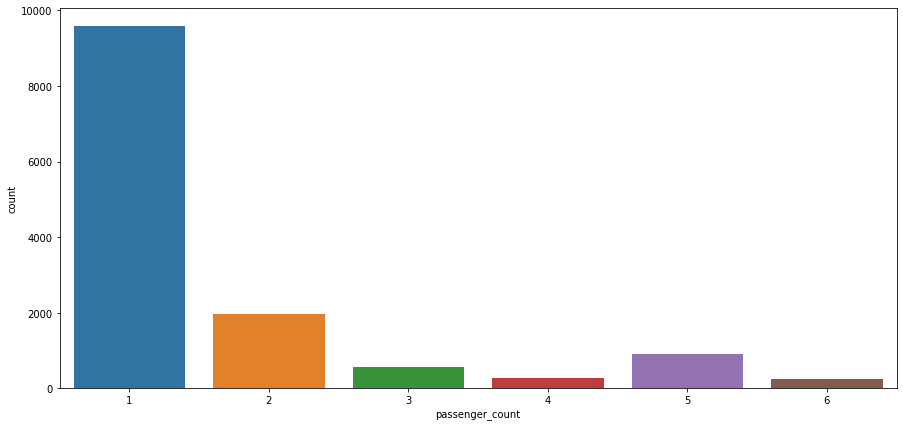

In [297]:
# Count plot on passenger count
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data=train)

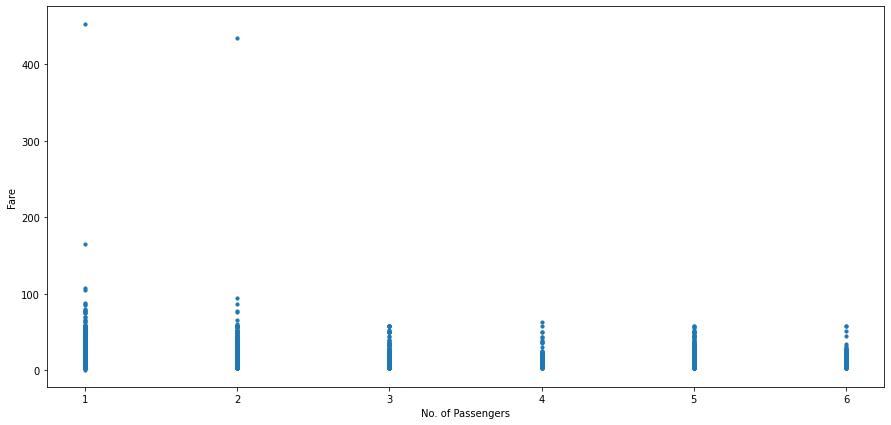

In [298]:
#Relationship beetween number of passengers and Fare

plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()

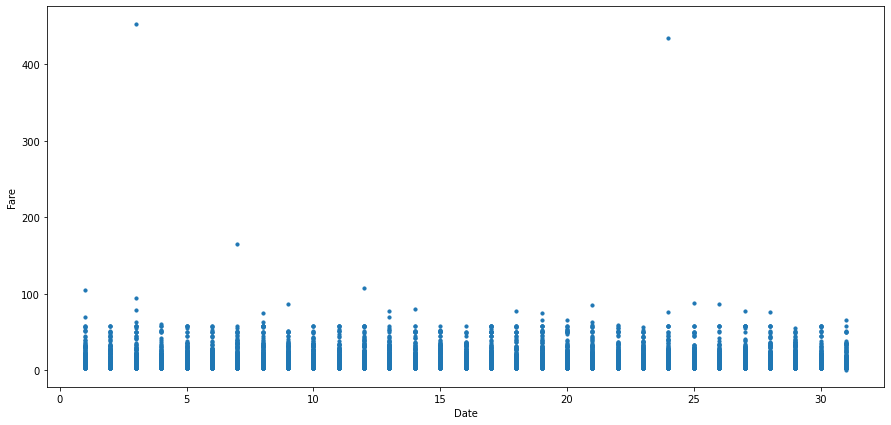

In [299]:
#Relationship between date and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

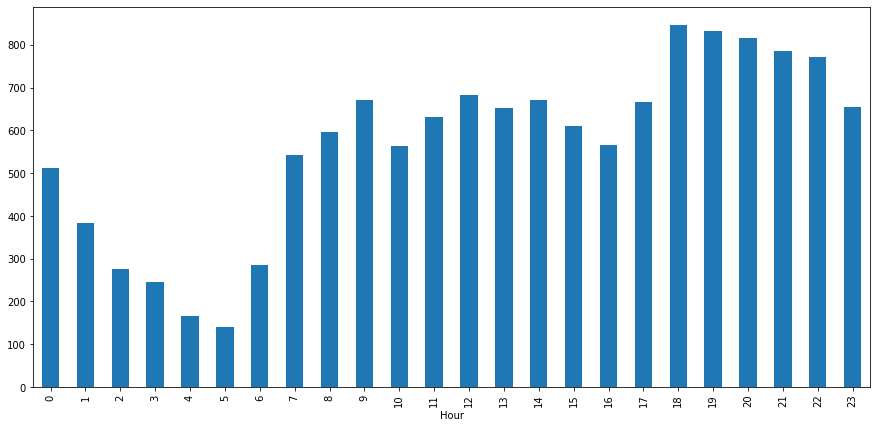

In [300]:

plt.figure(figsize=(15,7))
train.groupby(train["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

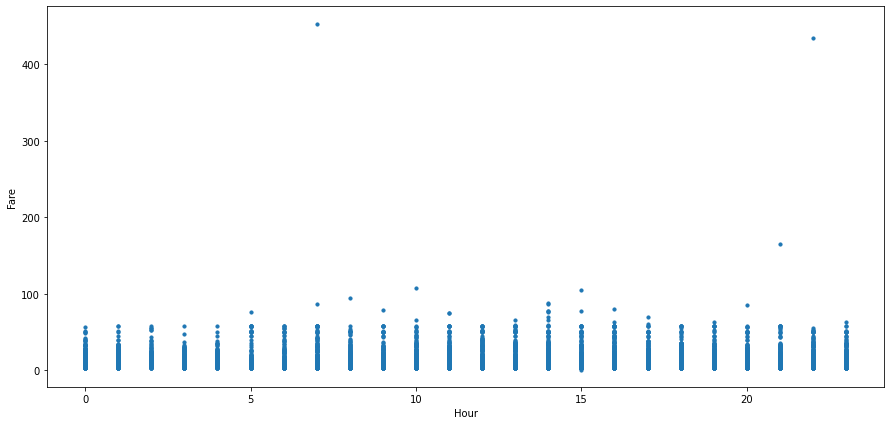

In [301]:

#Relationship between Time and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

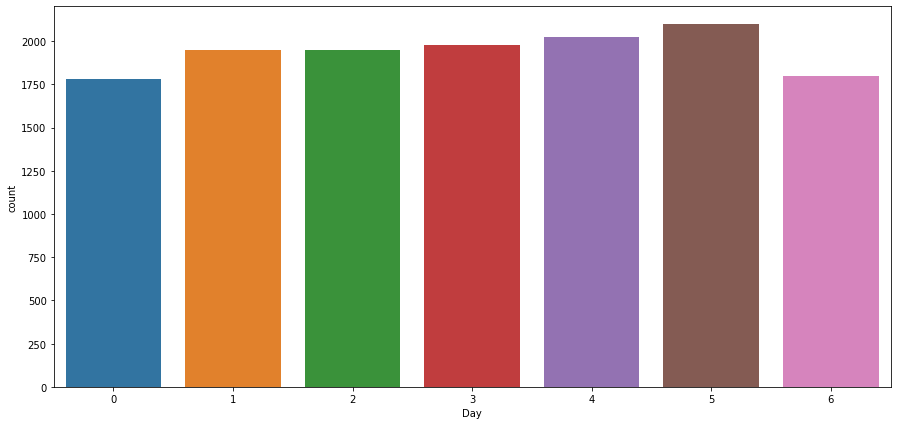

In [302]:
#impact of Day on the number of cab rides
plt.figure(figsize=(15,7))
sns.countplot(x="Day", data=train)

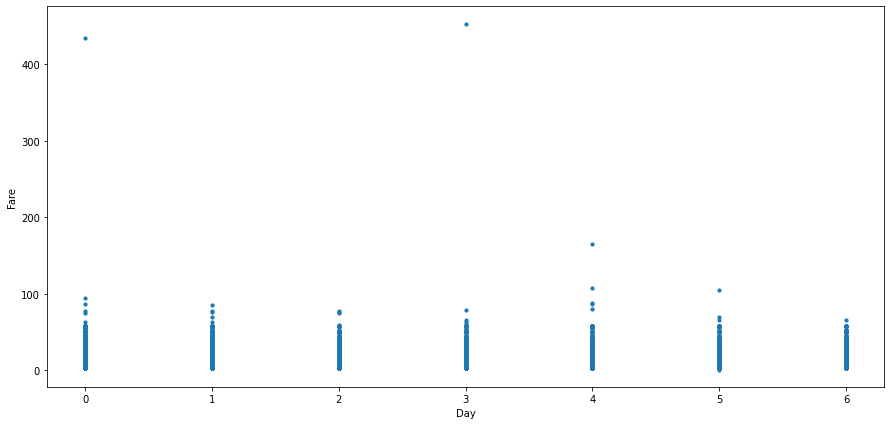

In [303]:
#Relationships between day and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['Day'], y=train['fare_amount'], s=10)
plt.xlabel('Day')
plt.ylabel('Fare')
plt.show()

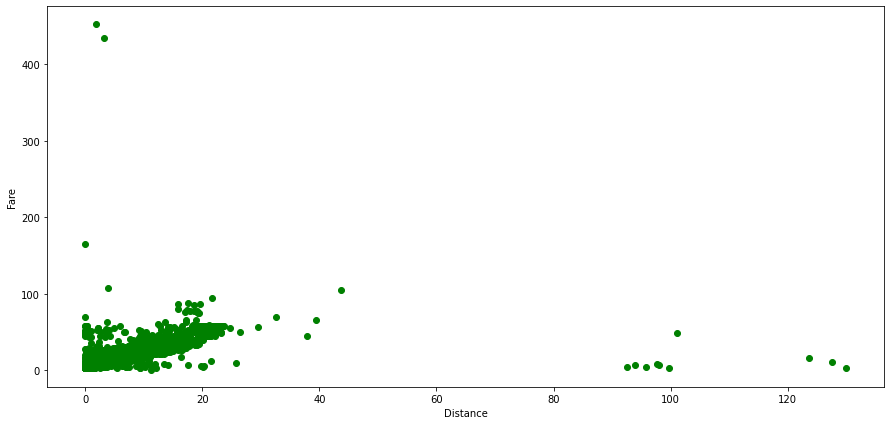

In [304]:

#Relationship between distance and fare 
plt.figure(figsize=(15,7))
plt.scatter(x = train['distance'],y = train['fare_amount'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

Feature Scaling

fare_amount


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


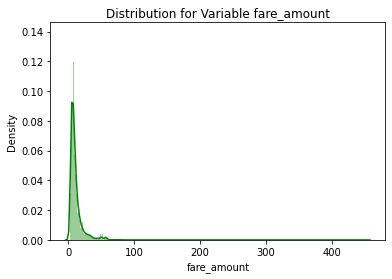

distance


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


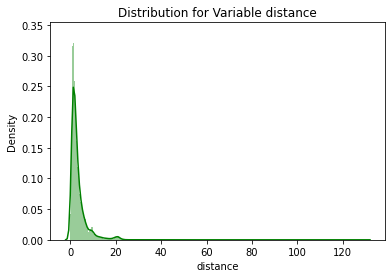

In [305]:
#Normality check of training data is uniformly distributed or not-

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [306]:

#since skewness of target variable is high, apply log transform to reduce the skewness-
train['fare_amount'] = np.log1p(train['fare_amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
train['distance'] = np.log1p(train['distance'])

fare_amount


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


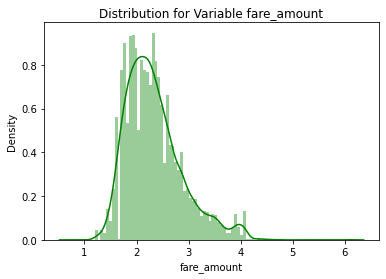

distance


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


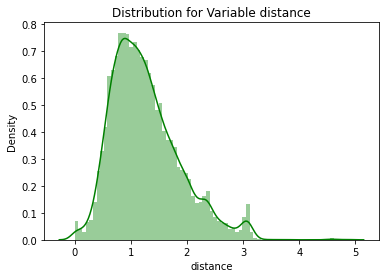

In [307]:
#Normality Re-check to check data is uniformly distributed or not after log transformartion

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


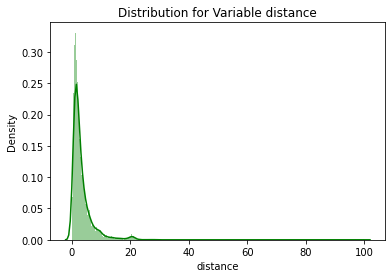

In [308]:
#Normality check for test data is uniformly distributed or not-

sns.distplot(test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [309]:

#since skewness of distance variable is high, apply log transform to reduce the skewness-
test['distance'] = np.log1p(test['distance'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


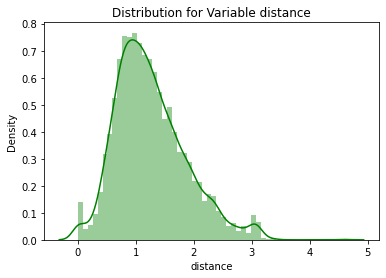

In [310]:

#rechecking the distribution for distance
sns.distplot(test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

ML algorithms

In [311]:

##train test split for further modelling
X_train, X_test, y_train, y_test = train_test_split( train.iloc[:, train.columns != 'fare_amount'], 
                         train.iloc[:, 0], test_size = 0.20, random_state = 1)

In [312]:

print(X_train.shape)
print(X_test.shape)

(10856, 7)
(2715, 7)


linear regression

In [313]:
# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

In [314]:

#prediction on train data
pred_train_LR = fit_LR.predict(X_train)

In [315]:

#prediction on test data
pred_test_LR = fit_LR.predict(X_test)

In [316]:
##calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [317]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

Root Mean Squared Error For Training data = 0.2765515432299964
Root Mean Squared Error For Test data = 0.2423220401313006


In [318]:
#calculate R^2 for train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_LR)

0.7469021725217135

In [380]:
print(y_train,pred_train_LR.reshape(-1,1))

1847     3.122365
12892    2.803360
8531     1.547563
8277     1.945910
612      2.066863
           ...   
994      2.687847
5454     1.704748
12682    2.917771
259      1.945910
13919    3.462606
Name: fare_amount, Length: 10856, dtype: float64 [[3.33051921]
 [2.83033703]
 [1.81350394]
 ...
 [2.54407982]
 [2.01358438]
 [3.17065656]]


In [384]:
X_train['pred_train_LR'] = pred_train_LR.reshape(-1,1)


In [392]:
X_train.head(5)

,passenger_count,year,Month,Date,Day,Hour,distance,pred_train_LR
1847,4,2010,5,9,6,1,2.675738,3.330519
12892,1,2014,8,23,5,7,1.798315,2.830337
8531,1,2010,5,6,3,20,0.680281,1.813504
8277,1,2013,11,1,4,10,0.627785,1.921960
612,2,2012,1,30,0,13,0.863027,2.012711


In [387]:
X_test['pred_train_LR'] = pred_test_LR.reshape(-1,1)

In [391]:
X_test.head(5)

,passenger_count,year,Month,Date,Day,Hour,distance,pred_train_LR
2615,1,2009,2,22,6,21,0.765051,1.809235
2916,1,2010,4,23,4,16,1.384689,2.338902
13820,5,2010,6,16,2,18,2.588249,3.300228
4140,1,2011,4,3,6,0,1.495795,2.445660
1087,1,2013,3,6,2,10,1.449162,2.501941


In [389]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,1.704748,1,2009,6,15,0,17,0.708412
1,2.884801,1,2010,1,5,1,16,2.246029
2,1.902108,2,2011,8,18,3,0,0.871095
3,2.163323,1,2012,4,21,5,4,1.334809
4,1.840550,1,2010,3,9,1,7,1.098331


In [319]:
r2_score(y_test, pred_test_LR)


0.7952478841617927

Decision tree

In [320]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

In [321]:
#prediction on train data
pred_train_DT = fit_DT.predict(X_train)

#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

In [322]:
##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [323]:
print("Root Mean Squared Error For Training data = "+str(RMSE_train_DT))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT))

Root Mean Squared Error For Training data = 0.3017061297693284
Root Mean Squared Error For Test data = 0.28079117408181997


In [324]:
## R^2 calculation for train data
r2_score(y_train, pred_train_DT)

0.6987656367569646

In [325]:

## R^2 calculation for test data
r2_score(y_test, pred_test_DT)

0.7250780153041204